In [5]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.base import BaseEstimator, TransformerMixin



# Load the training data
training_data = pd.read_excel('data/training_set_rel3.xls')
test_data = pd.read_excel('data/valid_set.xls')

In [6]:

# Sample data loading
# Replace this with your actual dataset
data = pd.read_csv('your_dataset.csv')
X = data['essay']
y = data['group']

# Define a custom transformer for sample weight calculation
class SampleWeightTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return compute_sample_weight(class_weight='balanced', y=y)

# Define a custom transformer for converting text data to xgb.DMatrix
class DMatrixTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: xgb.DMatrix(x))

# Define the XGBClassifier parameters
params = {
    'objective': 'multi:softprob',  # Utilisation de softprob pour la classification multi-classe
    'num_class': len(np.unique(y)),  # Nombre de classes
    'max_depth': 6,  # Profondeur maximale de chaque arbre
    'learning_rate': 0.1,  # Taux d'apprentissage
    'subsample': 0.8,  # Fraction des échantillons à utiliser pour chaque arbre (pour éviter le surajustement)
    'colsample_bytree': 0.8,  # Fraction des caractéristiques à utiliser pour chaque arbre
}

# Define the pipeline
pipeline = Pipeline([
    ('label_encoder', LabelEncoder()),
    ('features', ColumnTransformer([
        ('text', DMatrixTransformer(), 'essay'),
        ('sample_weight', SampleWeightTransformer(), ['essay']),
        ('classifier', XGBClassifier(**params), ['essay'])
    ]))
])


NameError: name 'y' is not defined

<Axes: title={'center': 'Distribution of domain1_score'}>

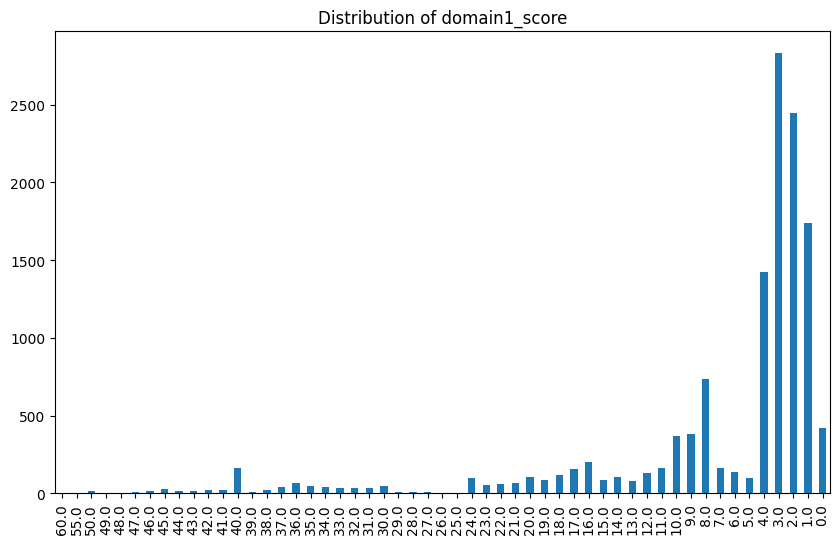